# Analysis of Pymaceuticals SCC Drug Treatments

Below is the data analysis of the four drug treatments: Capomulin, Infubinol, Ketapril, and Placebo. Under each graph, there is also an observation of the data based on the graph.

In [1]:
# Dependencies and Setup

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import seaborn as sns

# When looking at different styles, I liked the seaborn graph style so I set all my graphs to have the same style.

sns.set()

# Hide warning messages in notebook

import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)

mouse_drug_data = "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug_data, low_memory=False)
clinical_drug_df = pd.read_csv(clinical_trial_data, low_memory=False)

# Display the data table for preview

mouse_drug_df.head()


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
# Display the data table for preview

clinical_drug_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset

merge_data_df = pd.merge(clinical_drug_df, mouse_drug_df, on="Mouse ID", how="left")

# Display the data table for preview

merge_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to Data Frame

tumor_data_by_drug_time = pd.DataFrame(merge_data_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"])

# Format the Data Frame to pull data easier later

tumor_data_by_drug_time = tumor_data_by_drug_time.reset_index()

# Preview Data Frame

tumor_data_by_drug_time.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to Data Frame

standard_error_tumor_volumes = pd.DataFrame(merge_data_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"])

# Format the Data Frame to pull data easier later

standard_error_tumor_volumes = standard_error_tumor_volumes.reset_index()

# Preview Data Frame

standard_error_tumor_volumes.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Format the Data Frames using pivot()

tumor_vol_df = tumor_data_by_drug_time.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that re-formatting worked

tumor_vol_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:
# Do the same for standard error values

stand_err_df = standard_error_tumor_volumes.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

# Preview that re-formatting worked

stand_err_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [8]:
# Drop the columns of drugs that we are not analyzing

final_tumor_volume_regimens_df = tumor_vol_df.drop(columns=["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Preview Data Frame

final_tumor_volume_regimens_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [9]:
# Do the same for the standard error

final_tumor_volume_regimens_err_df = stand_err_df.drop(columns=["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Preview Data Frame

final_tumor_volume_regimens_err_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


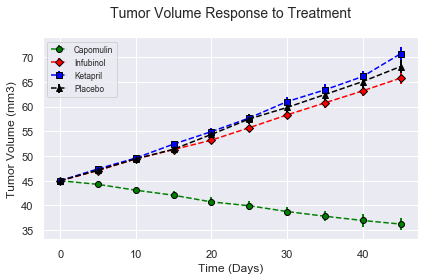

In [10]:
# Set the values for the x-axis to the drug names

x_axis = final_tumor_volume_regimens_df.index.values

# Get the tumor values for each of the drugs into a list using list comprehension 

y_axis_capomulin = [i for i in final_tumor_volume_regimens_df["Capomulin"]]
y_axis_infubinol = [i for i in final_tumor_volume_regimens_df["Infubinol"]]
y_axis_ketapril = [i for i in final_tumor_volume_regimens_df["Ketapril"]]
y_axis_placebo = [i for i in final_tumor_volume_regimens_df["Placebo"]]

# Get the standard error values for each drug by setting the column values to a list

capomulin_err = final_tumor_volume_regimens_err_df["Capomulin"].tolist()
infubinol_err = final_tumor_volume_regimens_err_df["Infubinol"].tolist()
ketapril_err = final_tumor_volume_regimens_err_df["Ketapril"].tolist()
placebo_err = final_tumor_volume_regimens_err_df["Placebo"].tolist()

# Create figure and subplot 

fig, ax = plt.subplots()

# Plot the data collected above with errorbars

ax.errorbar(x_axis, y_axis_capomulin, yerr=capomulin_err, linestyle="--", color="green", elinewidth=2, marker="o", markeredgecolor="black", label = "Capomulin")
ax.errorbar(x_axis, y_axis_infubinol, yerr=infubinol_err, linestyle="--", color="red", elinewidth=2, marker="D", markeredgecolor="black", label = "Infubinol")
ax.errorbar(x_axis, y_axis_ketapril, yerr=ketapril_err, linestyle="--", color="blue", elinewidth=2, marker="s", markeredgecolor="black", label = "Ketapril")
ax.errorbar(x_axis, y_axis_placebo, yerr=placebo_err, linestyle="--", color="black", elinewidth=2, marker="^", markeredgecolor="black", label = "Placebo")

# Label the x and y axis

ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

# Set the title with a larger font and some spacing for esthetics

ax.set_title("Tumor Volume Response to Treatment", fontsize=14, pad=20)

# Create a legend for the drugs 

plt.legend(loc="best", fontsize="small",fancybox = True)

# Make the graph look clean

plt.tight_layout()

# Save the Figure

plt.savefig("Tumor Volume Response to Treatment")

# Generate the Plot (with Error Bars)

plt.show()

### Observation: 

As seen in the above graph, "Tumor Volume Response to Treatment", the drug Capomulin (show in green) was the most effective in decreasing the tumor volume in the mice out of the other drugs being analyzed (Infubinol, Ketapril, and Placebo). The drugs Infubinol and Ketapril did not significantly change the tumor volume in the mice being treated by the respective drug. As seen in the graph, the Infubinol line data (red) and the Ketapril line data (blue) are very close to the tumor volume data for the mice that did not undergo any actual drug treatment (Placebo). 

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to Data Frame

avg_met_site_df = pd.DataFrame(merge_data_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"])

# Format the Data Frame to pull data easier later

avg_met_site_df = avg_met_site_df.reset_index()

# Preview Data Frame

avg_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Use pivot() to re-format the Data Frame

met_site_pivot = avg_met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview that re-formatting worked

met_site_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [13]:
# Drop the columns of the drugs we will not be analyzing

final_met_site_pivot_df = met_site_pivot.drop(columns=["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Preview the Data Frame

final_met_site_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [14]:
# Find the standard error of the metastatic sites

standard_error_avg_met_site_df = pd.DataFrame(merge_data_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]).reset_index()

# Preview the Data Frame

standard_error_avg_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [15]:
# Use pivot() to re-format Data Frame

met_site_err_pivot = standard_error_avg_met_site_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")

# Preview Data Frame

met_site_err_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [16]:
# Drop the columns of the drugs we will not be analyzing

met_site_err_pivot = met_site_err_pivot.drop(columns=["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Preview the Data Frame

met_site_err_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


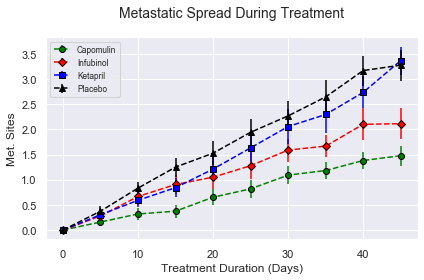

In [17]:
# Set x-axis values to the "Timepoint" data

x_axis = final_met_site_pivot_df.index.values

# Set the y-axis values to the values in each column using list comprehension

y_axis_capomulin = [i for i in final_met_site_pivot_df["Capomulin"]]
y_axis_infubinol = [i for i in final_met_site_pivot_df["Infubinol"]]
y_axis_ketapril = [i for i in final_met_site_pivot_df["Ketapril"]]
y_axis_placebo = [i for i in final_met_site_pivot_df["Placebo"]]

# Set the error values to a list using tolist()

capomulin_err = met_site_err_pivot["Capomulin"].tolist()
infubinol_err = met_site_err_pivot["Infubinol"].tolist()
ketapril_err = met_site_err_pivot["Ketapril"].tolist()
placebo_err = met_site_err_pivot["Placebo"].tolist()

# Create figure and subplot 

fig, ax = plt.subplots()

# Generate the Plot (with Error Bars)

ax.errorbar(x_axis, y_axis_capomulin, yerr=capomulin_err, linestyle="--", color="green", marker="o", markeredgecolor="black", label = "Capomulin")
ax.errorbar(x_axis, y_axis_infubinol, yerr=infubinol_err, linestyle="--", color="red", marker="D", markeredgecolor="black", label = "Infubinol")
ax.errorbar(x_axis, y_axis_ketapril, yerr=ketapril_err, linestyle="--", color="blue", marker="s", markeredgecolor="black", label = "Ketapril")
ax.errorbar(x_axis, y_axis_placebo, yerr=placebo_err, linestyle="--", color="black", marker="^", markeredgecolor="black", label = "Placebo")

# Set the x and y labels

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

# Set the title with a larger font and some spacing for esthetics

ax.set_title("Metastatic Spread During Treatment", fontsize=14, pad=20)

# Create legend

plt.legend(loc="best", fontsize="small",fancybox = True)

# Format the graph

plt.tight_layout()

# Save the Figure

plt.savefig("Metastatic Spread During Treatment")

# Show the Figure

plt.show()



### Observation:

Although the mice that underwent the four treatments Capomulin, Infubinol, Ketapril, and Placebo all had an increase in metastatic sites, it can be seen from the graph above ("Metastatic Spread During Treatment") that Capomulin slowed down the spread of the metastatic sites in the treated mice. Infubinol was also effective in slowing the spread of the metastatic sites in comparison with the control mice (placebo) while Ketapril did not seem to have a significant effect on the spread of the cancerous sites. 

When looking at the two graphs, "Tumor Volume Response to Treatment" and "Metastatic Spread During Treatment", Capomulin is the most successful in decreasing the tumor volume in the mice as well as slowing down the spread of metastatic sites. Though Infubinol was not as effective in decreasing the volume of the tumor, the drug was decently effective in slowing down the spread of cancerous cells. The drug Ketapril does not seem to have much effect on the cancerous cells.

## Survival Rates

In [18]:
# Store the count of mice grouped by "Drug" and "Timepoint"
# Convert to Data Frame

mouse_count = pd.DataFrame(merge_data_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"])

# Rename the columns to reflect mouse count

mouse_count = mouse_count.rename(columns={"Mouse ID" : "Mouse Count"})

# Format the Data Frame to pull data easier later

mouse_count = mouse_count.reset_index()

# Preview Data Frame

mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [19]:
# Use pivot() to re-format Data Frame

mouse_count_pivot = mouse_count.pivot(index="Timepoint", columns="Drug", values="Mouse Count")

# Preview the Data Frame

mouse_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [20]:
# Drop columns of drugs we are not analyzing

mouse_count_pivot = mouse_count_pivot.drop(columns=["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"])

# Preview Data Frame

mouse_count_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [21]:
# Calculate survival rate of the mice by taking values and dividing by 25, the starting number of mice for each drug 
# Multiply by 100 to get percentage amount

survival_rate = (mouse_count_pivot/25)*100

# Display Data Frame

survival_rate

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


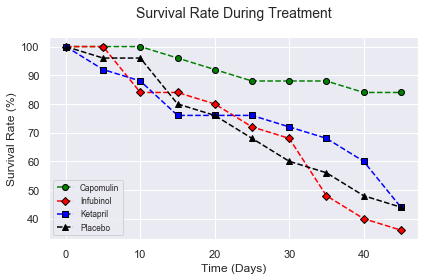

In [22]:
# Get the x-axis values from the index values of the Data Frame

x_axis = survival_rate.index.values

# Set the y-axis values to the values in each column using list comprehension

y_axis_capomulin = [i for i in survival_rate["Capomulin"]]
y_axis_infubinol = [i for i in survival_rate["Infubinol"]]
y_axis_ketapril = [i for i in survival_rate["Ketapril"]]
y_axis_placebo = [i for i in survival_rate["Placebo"]]

# Generate the Plot (Accounting for percentages)

plt.plot(x_axis, y_axis_capomulin, linestyle="--", color="green", marker="o", markeredgecolor="black", label = "Capomulin")
plt.plot(x_axis, y_axis_infubinol, linestyle="--", color="red", marker="D", markeredgecolor="black", label = "Infubinol")
plt.plot(x_axis, y_axis_ketapril, linestyle="--", color="blue", marker="s", markeredgecolor="black", label = "Ketapril")
plt.plot(x_axis, y_axis_placebo, linestyle="--", color="black", marker="^", markeredgecolor="black", label = "Placebo")

# Set the x and y labels

plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Set the title with a larger font and some spacing for esthetics

plt.title("Survival Rate During Treatment", fontsize=14, pad=20)

# Create legend

plt.legend(loc="best", fontsize="small",fancybox = True)

# Clean up look of graph

plt.tight_layout()

# Save the Figure

plt.savefig("Survival Rate During Treatment")

# Show the Figure

plt.show()


### Observations:

In the above graph, "Survival Rate During Treatment", the mice that underwent the Capomulin drug treatment had the highest survival rate in comparison to the mice that underwent the Infubinol, Ketapril, and Placebo drug treatments. The mice that underwent the Infubinol treatment (red) seem to have the lowest survival rate.

Though Infubinol was decently effective in slowing down the spread of cancerous cells, this graph shows that Infubinol was detrimental to the survival rate of the mouse being treated. It would seem that the mice that underwent the Infubinol treatment had a lower survival rate than the control mice (Placebo).

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug being analyzed. I took the tumor volume at day 45 and subtracted it from the original tumor volume to get the change in tumor volume. I then multiplied that by 100 to get the percent tumor volume change.

percent_change_df = (final_tumor_volume_regimens_df.iloc[9,:]-final_tumor_volume_regimens_df.iloc[0,:])*100/final_tumor_volume_regimens_df.iloc[0,:]

# Convert to Data Frame

percent_change_df = pd.DataFrame(percent_change_df)

# Clean up Data Frame with rename()

percent_change_df = percent_change_df.rename(columns={0 : "Percent Tumor Change"})

# Display the data to confirm

percent_change_df

,Percent Tumor Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


In [24]:
# Set x-axis values to the drug names

x_axis=percent_change_df.index.values

# Set the y-axis as the percent changes for each drug

y_axis=percent_change_df["Percent Tumor Change"]

# Create a new column labeled "Positive" to store Boolean - if the percent change is positive, it will be True and if the percent change is negative, it will be False.

percent_change_df["Positive"]=percent_change_df["Percent Tumor Change"] > 0

# Display Data Frame

percent_change_df


,Percent Tumor Change,Positive
Drug,,
Capomulin,-19.475303,False
Infubinol,46.123472,True
Ketapril,57.028795,True
Placebo,51.297960,True


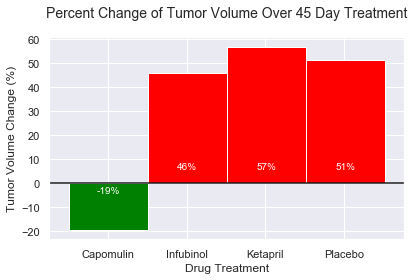

In [25]:
# Create figure and subplot 

fig, ax = plt.subplots()

# Set the bar graph to a variable to be used later (formatting purposes)
# For the bar graph, I set the color to green if the value was negative and red if the value was positive by using map() on the values in the "Positive" column. Since the values are either True are False, the colors are set as red for True and green for False. 

graph=ax.bar(x_axis,y_axis,align="edge",width=1,linewidth=1, edgecolor="white", color=percent_change_df["Positive"].map({True: 'red', False: 'green'}))

# Place the drug names on the graph in the center of the bars

drug_names = [name+0.49 for name in range(len(x_axis))]
ax.set_xticks(drug_names)

# In order to get the percent change numbers to display near the zero line, I need to set the height. For negative numbers, I want the percent displayed below the zero line and for positive numbers, I want the percent displayed above the zero line.
# Using map(), I set the height to 5 for positive numbers (True) and -5 for negative numbers (False).

height_in_graph = percent_change_df["Positive"].map({True: 5, False: -5})

# In order to get the percent value to display on the chart, I used ax.text() in a loop.
# The height of where the value should be was set earlier. 
# I need to convert the integer numbers in the "Percent Tumor Change" column to string to get the numbers displayed with "%."

for drug in graph:
    ax.text(drug.get_x() + drug.get_width()/2., height_in_graph[graph.index(drug)], str(int(percent_change_df["Percent Tumor Change"][graph.index(drug)]))+"%", color = "white", ha='center', va='bottom')

# Make the graph look nicer by giving some space around the bars and the edge of the graph.    
    
ax.set_xlim(-0.25, len(x_axis)+0.25)

# Set a line at zero.

plt.hlines(0,-0.25,len(x_axis) +0.25)

# Set the x and y labels.

ax.set_ylabel("Tumor Volume Change (%)")
ax.set_xlabel("Drug Treatment")

# Set the title with a larger font and some spacing for esthetics

ax.set_title("Percent Change of Tumor Volume Over 45 Day Treatment", fontsize=14, pad=20)

# Clean up look of graph

plt.tight_layout()

# Save the Figure

plt.savefig("Percent Change of Tumor Volume Over 45 Day Treatment")

# Show the Figure

plt.show()

### Observation:

As seen in the above graph, "Percent Change of Tumor Volume Over 45 Day Treatment", Capomulin was the most effective in decreasing the tumor volume in the treated mice. The mice that underwent the other treatments (Infubinol, Ketapril, and Placebo) all had around a 50% tumor volume change (red) while Capomulin had a negative 19% tumor volume change (green).